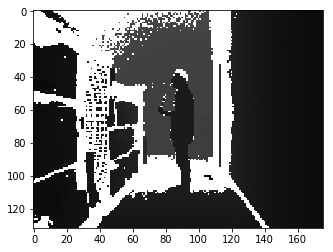

In [207]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys

#f = open(sys.argv[1],"r")
#contents = f.read()
#f.close()
env1 = np.loadtxt('human_corridor_1.txt') #read content from input file
img = env1
plt.rcParams['image.cmap'] = 'gray'   # Necessary to override default matplot behaviour
plt.imshow(img)

In [208]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    # return the edged image
    return edged

def denoise(image,lower,upper):
    drawing = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if (image[i,j] < lower):
                drawing[i,j] = 0
            elif(image[i,j] > upper):
                drawing[i,j] = 255
            else:
                drawing[i,j]=image[i,j]
    return drawing

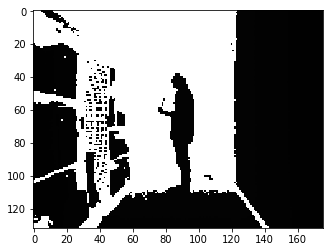

In [209]:
drawing = denoise(img,1,4)        
plt.imshow(drawing)
plt.show()

img1  = auto_canny(cv2.GaussianBlur(drawing, (5, 5), 0))
img1  = cv2.dilate(img1, None, iterations=2)
img1  = cv2.erode(img1, None, iterations=2)
cropped = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
cropped[30:108,60:120]=img1[30:108,60:120]# get the interested region

right 0.55


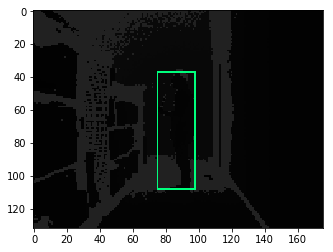

In [214]:
img2, contours, hierarchy = cv2.findContours(cropped, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:1]
screenCnt = None
contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)
for i, c in enumerate(contours):
    contours_poly[i] = cv2.approxPolyDP(c, 3, True)
    boundRect[i] = cv2.boundingRect(contours_poly[i])

left = boundRect[0][0]-60
right = 120-(boundRect[0][0]+boundRect[0][2])
print("left",left*1.5/60) if (left > right) else print("right",right*1.5/60)

cv2.imwrite('haha.png',env1)
image = cv2.imread('haha.png')
for i in range(len(contours)):
    color = (0, 255, 125)
    cv2.rectangle(image, (int(boundRect[i][0]), int(boundRect[i][1])), \
      (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 1)
plt.imshow(image)
plt.show()